# MULTIVARIATE ANALYSIS


In [1]:
#packages used
library(ggplot2)
library(MASS)  
library(stats)
library(readxl)

In [2]:
data <- read_excel("Thyroid.xlsx")
head(data,1)

Age,Sex,Referral source,TSH,T3,TT4,FTI,Indicator status
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
41,F,SVHC,1.3,2.5,125,109,P


In [3]:
names(data)[c(3, 8)] <- c("Referral_source", "Indicator_status")

In [4]:
head(data,1)


Age,Sex,Referral_source,TSH,T3,TT4,FTI,Indicator_status
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
41,F,SVHC,1.3,2.5,125,109,P


In [5]:
#summary statistics
summary(data)

      Age            Sex            Referral_source         TSH          
 Min.   : 1.00   Length:400         Length:400         Min.   :  0.0050  
 1st Qu.:35.75   Class :character   Class :character   1st Qu.:  0.5925  
 Median :50.50   Mode  :character   Mode  :character   Median :  1.4000  
 Mean   :50.91                                         Mean   :  5.1007  
 3rd Qu.:65.25                                         3rd Qu.:  2.4000  
 Max.   :87.00                                         Max.   :199.0000  
       T3             TT4             FTI        Indicator_status  
 Min.   :0.050   Min.   :  5.8   Min.   :  7.0   Length:400        
 1st Qu.:1.500   1st Qu.: 86.0   1st Qu.: 94.0   Class :character  
 Median :1.900   Median :103.0   Median :108.0   Mode  :character  
 Mean   :1.962   Mean   :106.8   Mean   :109.8                     
 3rd Qu.:2.300   3rd Qu.:123.0   3rd Qu.:125.0                     
 Max.   :6.000   Max.   :257.0   Max.   :312.0                     

In [6]:
# Get unique of the categorical variables
#unique_values <- unique(data$Referral_source)
#unique_values <- unique(data$Sex)
unique_values <- unique(data$Indicator_status)
# Print unique values
print(unique_values)

[1] "P" "N"


# Q1

Dataset description:

The Thyroid dataset is made up of 8 variable and 400 entries.
Age: Is a numeric variable with a minimum value of 1 and a maximum value of 87, continuous.
Sex: Is a categorical variable (M, F) , for Male and Female.
System of Referral: Is a character variable of of 5 unique values .
Blood Test Results:Are four quantitative variables.
Namely: 

    TSH >>With a mean and median of (5.1007,1.4000) respectively. Minimum value and Maximum value of (0.0050 ,199.0000) respectively
    
    T3  >>With a mean and median of (1.962,1.900) respectively. Minimum value and Maximum value of (0.050 ,6.000) respectively
    
    TT4 >>With a mean and median of (106.8,103.0) respectively. Minimum value and Maximum value of (5.8 ,257.0) respectively
    
    FTI >>With a mean and median of (109.8,108.0) respectively. Minimum value and Maximum value of (7.0 ,312.0) respectively

Indicator Test Result: Is a categorical variable with two unique values (P/N).

# Q2(i)

In [7]:
# Age Groups var
data$AgeGroup <- cut(data$Age, breaks = c(-Inf, 35, 50, 65, Inf), 
                     labels = c('35 and under', '36 to 50', '51 to 65', '66 and over'))

# Indicator Status proportion of 'P' and 'N' in each age group.
prop.table(table(data$AgeGroup, data$Indicator_status), 1)


              
                  N    P
  35 and under 0.03 0.97
  36 to 50     0.12 0.88
  51 to 65     0.09 0.91
  66 and over  0.06 0.94

# Q2(ii)

In [8]:
# Sample mean vector for the four blood test results
mean_vector <- colMeans(data[, c("TSH", "T3", "TT4", "FTI")])
mean_vector


TSH         T3        TT4        FTI 
  5.100750   1.962375 106.792000 109.817250

# Q2(iii)

In [9]:
# The quantitative variable that exhibits the greatest level of variation around the mean
sds <- apply(data[, c("TSH", "T3", "TT4", "FTI")], 2, sd)
max_var_test <- names(which.max(sds))
max_var_test


[1] "TT4"

# Q2(iv)

In [10]:
# Correlation matrix for the blood test results
cor_matrix <- cor(data[, c("TSH", "T3", "TT4", "FTI")])
# Pair with the highest correlation
highest_corr_pair <- which(abs(cor_matrix) == max(abs(cor_matrix[lower.tri(cor_matrix)])), arr.ind = TRUE)
print(highest_corr_pair)

    row col
FTI   4   3
TT4   3   4


# Q3(i)

In [11]:
# Blood result subset 
data_subset <- data[, c("TSH", "T3", "TT4", "FTI")]

# Subset matrix
data_matrix <- as.matrix(data_subset)

# Null hypothesis mean vector (mu0)
mu0 <- c(5, 2, 110, 110)

# Number of observations and var
n <- nrow(data_matrix)
p <- ncol(data_matrix)

# Sample mean vector
sample_mean <- colMeans(data_matrix)

# Sample covariance matrix
S <- cov(data_matrix)

# Hotelling's T-squared statistic
T2 <- n * t(sample_mean - mu0) %*% solve(S) %*% (sample_mean - mu0)

# Degrees of freedom(dof)
df1 <- p
df2 <- n - 1

# p-value using F-distribution
p_value <- pf(T2, df1, df2, lower.tail = FALSE)

# Test statistic and p-value
list(T2 = T2, p_value = p_value)

 


8.403991
1.618715e-06


Test if the population mean vector of the four quantitative variables is equal to:
 µ = (5,2,110,110)

Null hypothesis(H0): The the population mean vector is equal to mu0.

The calculated Hotelling's T-squared statistic (T2 = 8.403991) shows a significant deviation of the sample mean vector from the specified mean vector mu0 = c(5, 2, 110, 110).

The very low p-value (p_value = 1.618715e-06) provides strong evidence suggesting that the population mean vector is not equal to mu0.

Hence:
Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis that the population mean vector of the variables TSH, T3, TT4, and FTI differs from (5, 2, 110, 110) at 0.05 statistical significant level.

# Q3(ii)

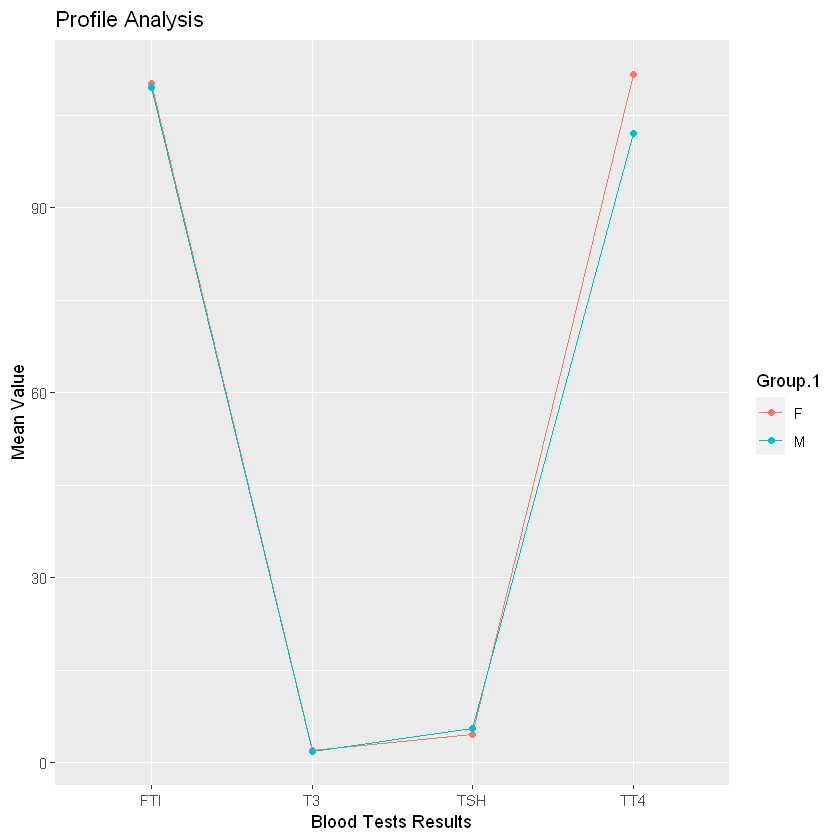

In [12]:
# Load the required libraries
library(ggplot2)
library(tidyr)  

# Calculate mean profiles for males and females
profile_means <- aggregate(data[, c("TSH", "T3", "TT4", "FTI")],
                           by = list(data$Sex), FUN = mean)

# Reshape data to pivot_longer
profile_means_long <- pivot_longer(profile_means, cols = -Group.1,
                                   names_to = "Test", values_to = "Mean")

# Profile plot 
ggplot(profile_means_long, aes(x = Test, y = Mean, color = Group.1, group = Group.1)) +
  geom_line() + geom_point() +
  labs(title = "Profile Analysis", x = "Blood Tests Results", y = "Mean Value")


# Q4(i)

In [13]:
# One-way MANOVA test 
manova_result <- manova(cbind(TSH, T3, TT4, FTI) ~ AgeGroup, data = data)
summary(manova_result)



           Df  Pillai approx F num Df den Df    Pr(>F)    
AgeGroup    3 0.15228   5.2805     12   1185 9.774e-09 ***
Residuals 396                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Null hypothesis(H0): There is no significant difference in the means of the blood tests across age groups.

The p-value (9.774e-09) is < 0.05 Hence; Reject the Null hypothesis
AgeGroup has a statistically significant effect on the combined blood test results (TSH, T3, TT4, FTI)

# Q4(ii)

In [14]:
# Perform individual ANOVA tests
anova_results <- lapply(data[, c("TSH", "T3", "TT4", "FTI")], 
                        function(x) summary(aov(x ~ data$AgeGroup)))
anova_results



$TSH
               Df Sum Sq Mean Sq F value Pr(>F)  
data$AgeGroup   3   2459   819.6   2.289 0.0779 .
Residuals     396 141759   358.0                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$T3
               Df Sum Sq Mean Sq F value   Pr(>F)    
data$AgeGroup   3  31.08  10.362   17.92 6.35e-11 ***
Residuals     396 229.00   0.578                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$TT4
               Df Sum Sq Mean Sq F value   Pr(>F)    
data$AgeGroup   3  20354    6785   5.805 0.000685 ***
Residuals     396 462802    1169                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$FTI
               Df Sum Sq Mean Sq F value Pr(>F)  
data$AgeGroup   3   7694    2564   2.469 0.0616 .
Residuals     396 411340    1039                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


AgeGroup has a statistically significant effect on T3 and TT4 but also Is statistically insignificant  to blood test result FTI and TSH.
This differs from what we obtain from MANOVA test that AgeGroup has a statistically significant effect on the combined blood test results (TSH, T3, TT4, FTI)

Comment on two main problems when taking this approach to assess to variables individually.
1. Variable combine / interaction effect multiple testing is lost.
2. loss of multivariate structure.

# Q4(iii)

In [15]:
 # LDA model
lda_result <- lda(AgeGroup ~ TSH + T3 + TT4 + FTI, data = data)

#LDA summary
print(lda_result)


Call:
lda(AgeGroup ~ TSH + T3 + TT4 + FTI, data = data)

Prior probabilities of groups:
35 and under     36 to 50     51 to 65  66 and over 
        0.25         0.25         0.25         0.25 

Group means:
                 TSH     T3     TT4     FTI
35 and under 2.22865 2.4120 118.840 114.740
36 to 50     9.06660 1.8360 101.490 102.889
51 to 65     4.47500 1.9430 105.358 111.980
66 and over  4.63275 1.6585 101.480 109.660

Coefficients of linear discriminants:
              LD1         LD2         LD3
TSH -0.0001012972 -0.02823613 -0.02667672
T3  -1.2724265387  0.13645621 -0.97739893
TT4 -0.0087001735 -0.02358259  0.04550735
FTI  0.0135153867  0.03531398 -0.02996180

Proportion of trace:
   LD1    LD2    LD3 
0.8482 0.1284 0.0234 


First Linear Discriminant (LD1): Explains 84.82% of the variance, this is the most important discriminant function.

T3 has the highest absolute weight (-1.2724265387), making it the most significant variable and contributed the most to the rejection of the null hypothesiss.

# Q5

In [16]:
# Two-way MANOVA
two_way_manova <- manova(cbind(TSH, T3 , TT4, FTI ) ~ AgeGroup * Sex, data = data)
summary(two_way_manova)


              Df   Pillai approx F num Df den Df    Pr(>F)    
AgeGroup       3 0.156827   5.3918     12   1173 5.739e-09 ***
Sex            1 0.052059   5.3407      4    389 0.0003391 ***
AgeGroup:Sex   3 0.022989   0.7548     12   1173 0.6976657    
Residuals    392                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Null hypothesis(H0): There is no significant interaction effect between AgeGroup and Sex on the blood test results.

1. AgeGroup Main Effect on  :
The p-value (5.739e-09) is < 0.05 , hence we reject the null hypothesis.
We conclude that AgeGroup has a significant effect on the combined dependent variables.
This suggests that different age groups have different profiles for the blood test results

2. Sex Main Effect :
The p-value (0.0003391) is < 0.05, hence we reject the null hypothesis.
We conclude that Sex has a significant effect on the combined dependent variables.
This suggests that males and females have different profiles for the blood test results.

3. Interaction Effect of (AgeGroup * Sex):
The p-value (0.6976657) is > 0.05, hence accept the null hypothesis. 
We conclude that there is no significant interaction effect between AgeGroup and Sex on the combined dependent variables.
This suggests that age affects the blood test results does not significantly differ between males and females.

   FINDINGS:
The analysis indicates that both AgeGroup and Sex independently influence the blood test results (TSH, T3, TT4, FTI), but there is no evidence of a significant interaction effect between AgeGroup and Sex. 

# Q6

# Conclusion of the Main Findings

Introduction:

Descriptive Statistics:  

MANOVA: 

ANOVA: 

Discriminant Analysis: 

Two-way MANOVA:

Overall Interpretation: suggest possible next steps or additional analysis to improve your understanding of the data.